# Sanbercode Final Project
### Clustering the Countries by using K-Means for HELP International
by Muhammad Naufal Rafi

---

# 1. Business/Project Understanding
## 1.1 Problem Definition
    HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam. HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

## 1.2 Objective
    Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

# 2. The Data

* Negara : Nama negara
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Check Missing Values
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [6]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# Mengecek apakah terdapat data yang terduplikasi
df.duplicated().any()

False

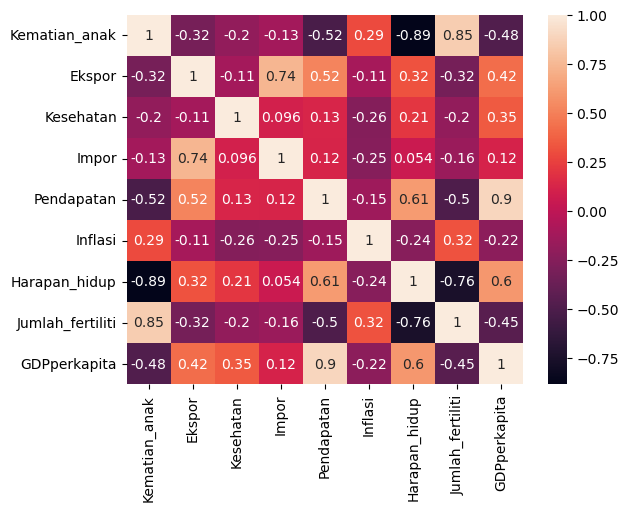

In [13]:
sns.heatmap(df.corr(), annot =True, fmt='.2g');
plt.show()


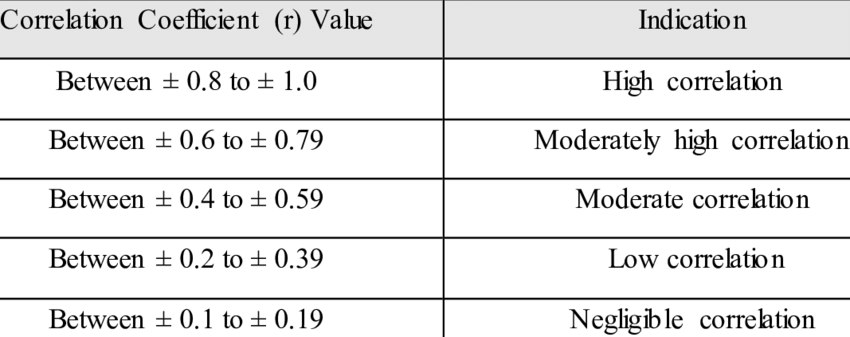

Berdasarkan grafik korelasi diatas dapat disimpulkan bahwa:
* GDPperkapita memiliki korelasi yang sangat tinggi terhadap Pendapatan, serta memiliki korelasi yang tinggi terhadap harapan hidup.
* Kematian_anak memiliki invers korelasi yang moderat terhadap Pendapatan dan GDPperkapita, sedangkan dengan Jumlah_fertiliti memiliki korelasi yang sangat tinggi.
* Nilai Ekspor memiliki korelasi yang tinggi terhadap nilai Ekspor dan memiliki korelasi moderat terhadap GDP perkapita

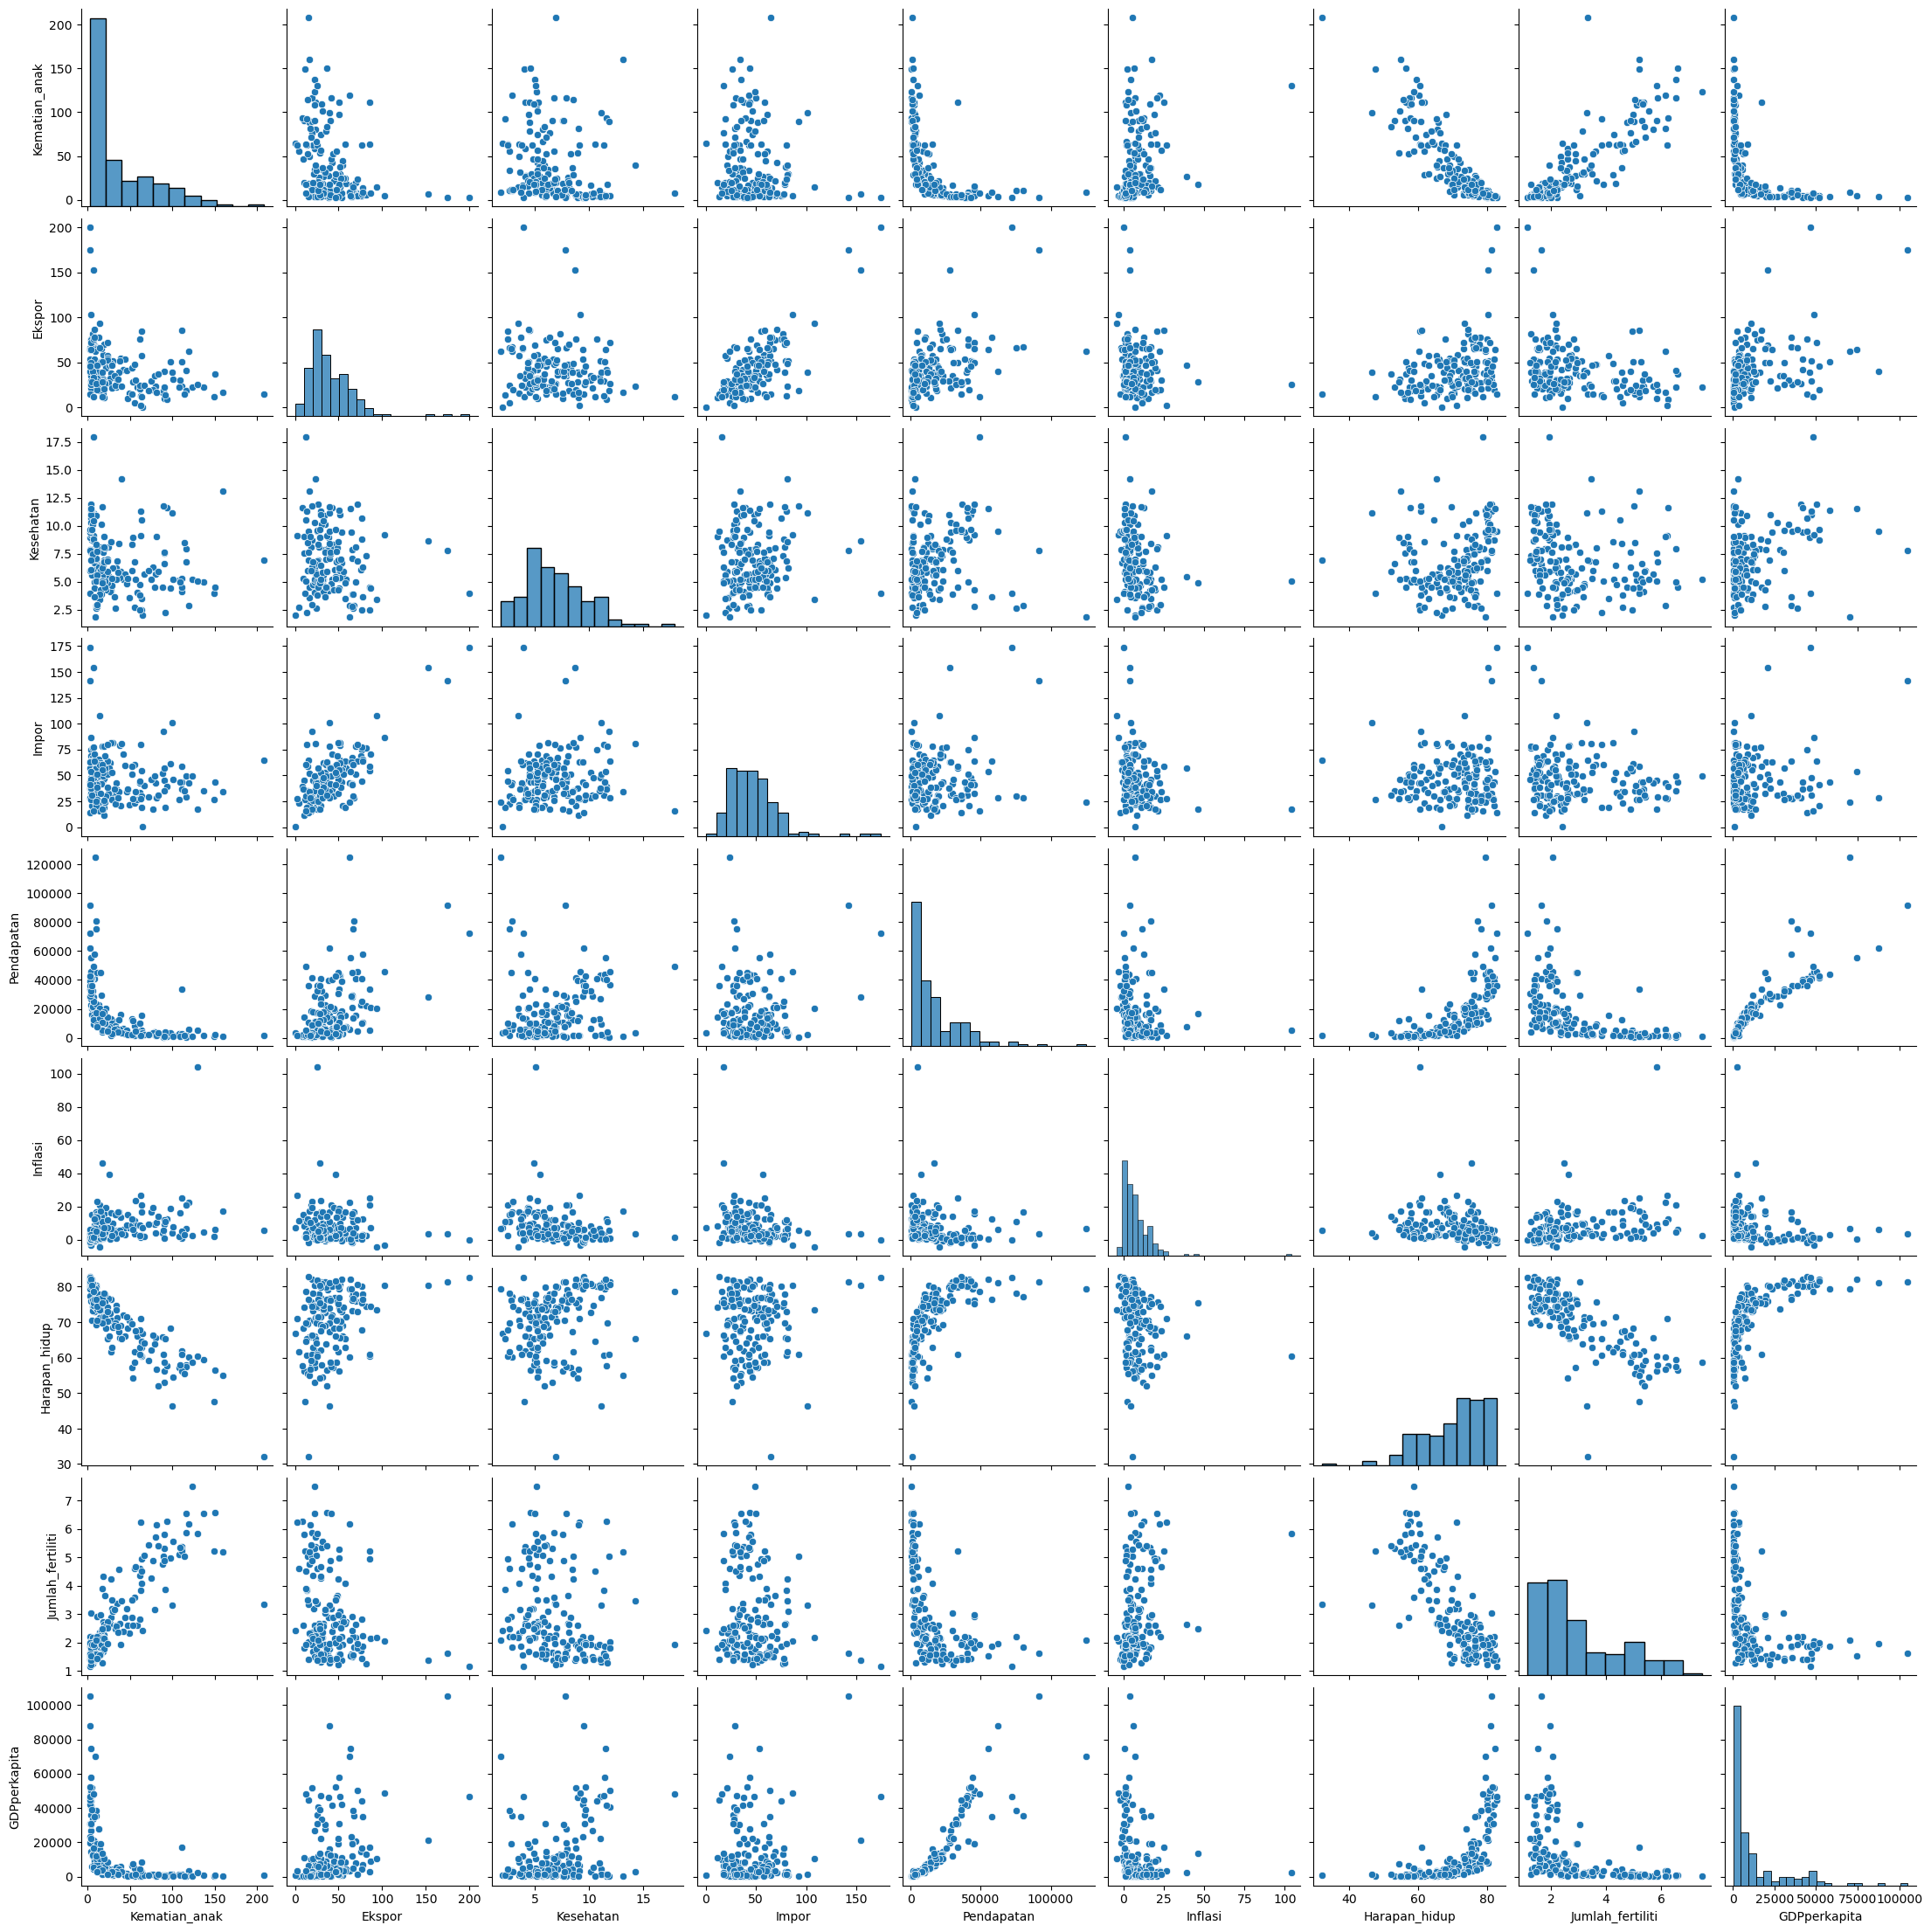

In [14]:
sns.pairplot(df);
plt.show()

In [15]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

Dari beberapa variabel diatas dapat dikelompokkan sebagai berikut:

Faktor Sosial Ekonomi:
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

Faktor Kesehatan:
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama

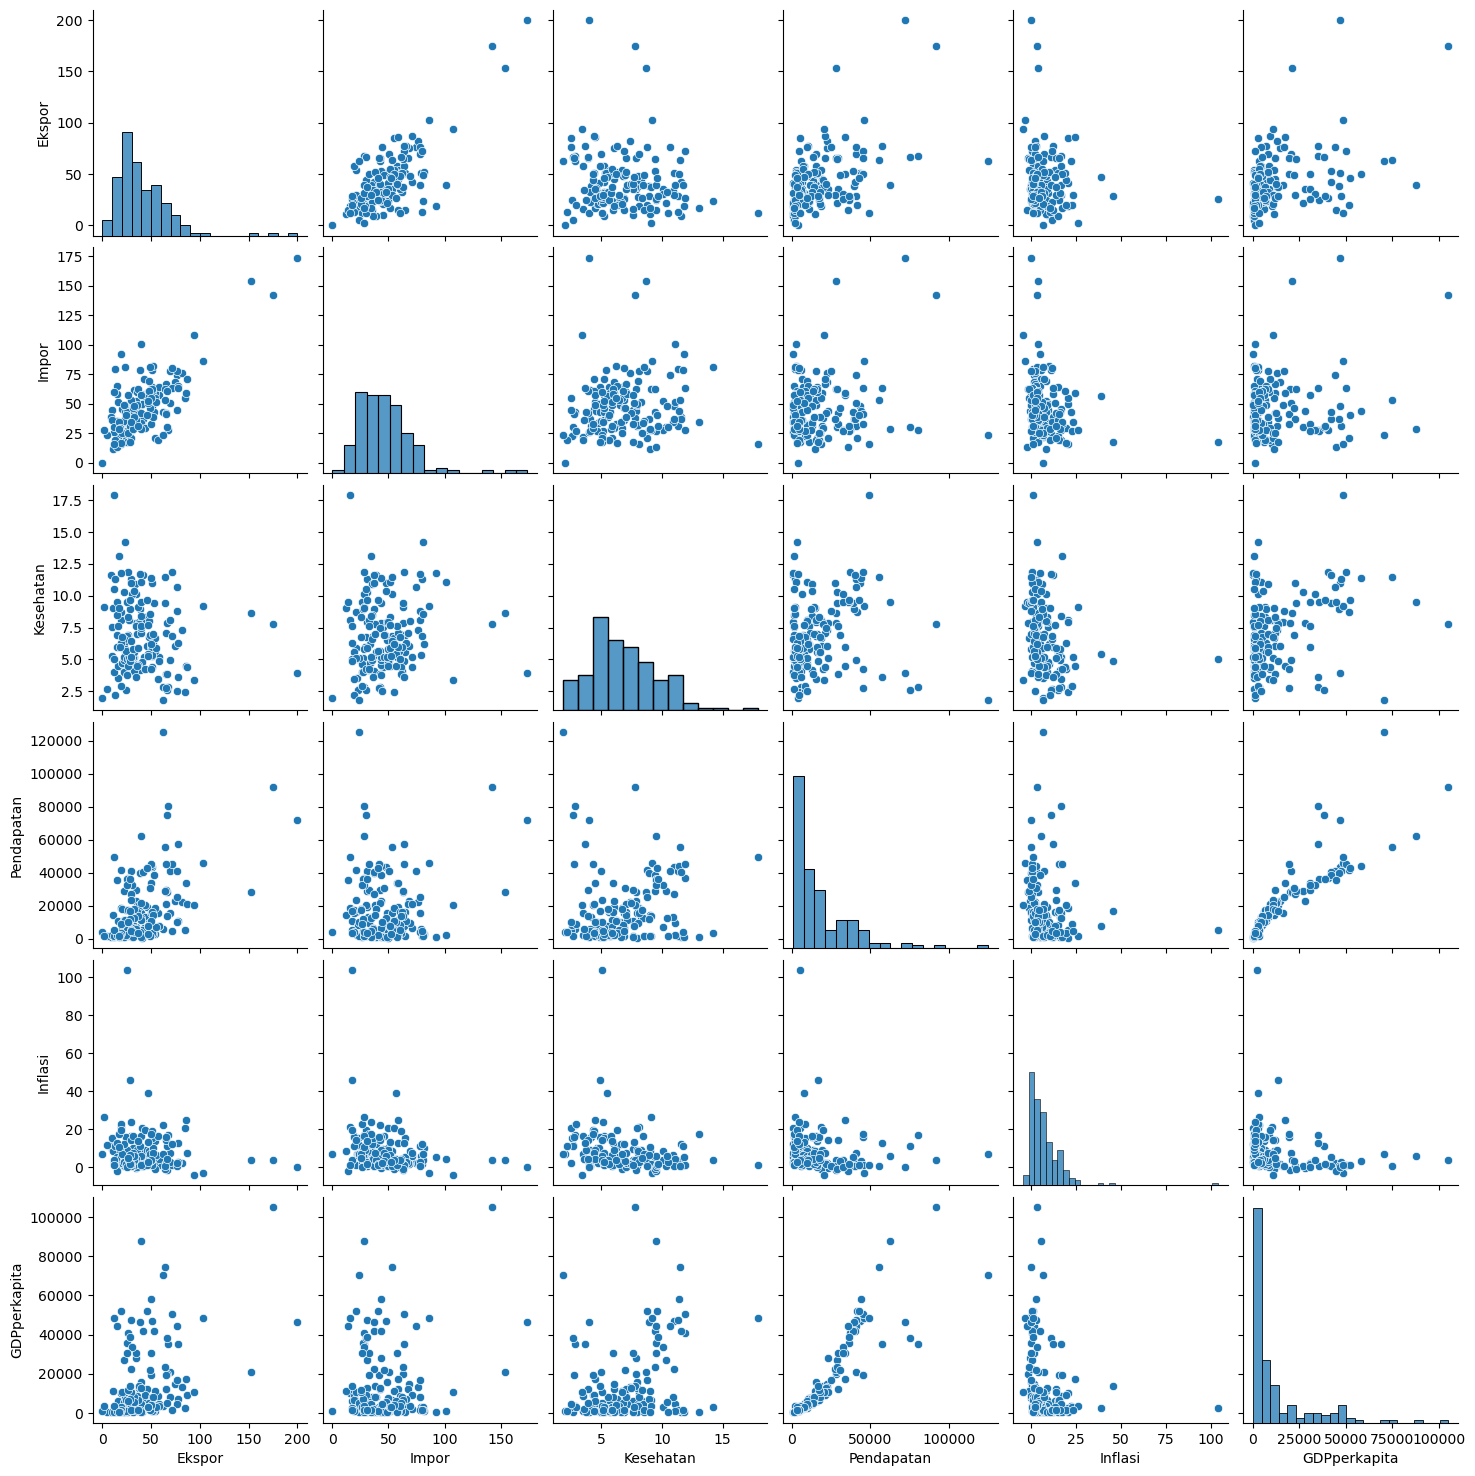

In [25]:
# Faktor Sosial Ekonomi
faktor_sosial_ekonomi = df[['Ekspor', 'Impor','Kesehatan', 'Pendapatan', 'Inflasi', 'GDPperkapita']]
sns.pairplot(faktor_sosial_ekonomi); 

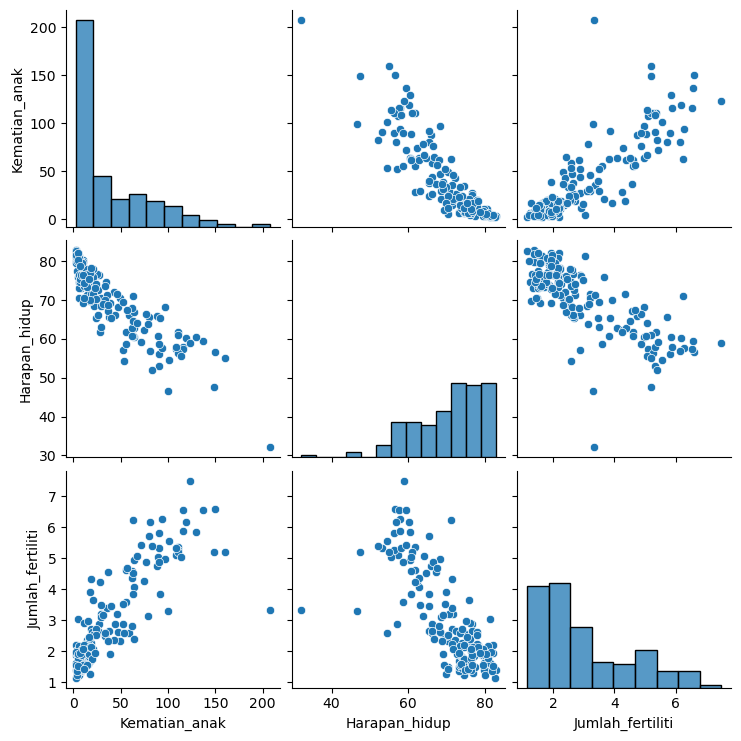

In [26]:
# Faktor Kesehatan
faktor_kesehatan = df[['Kematian_anak','Harapan_hidup', 'Jumlah_fertiliti']]
sns.pairplot(faktor_kesehatan);

Dari kedua faktor tersebut, pada projek ini akhirnya memutuskan untuk menggunakan features GDPperkapita dan juga Kematian_anak sebagai 2 buah faktor yang nantinya digunakan sebagai acuan dalam menentukan prioritas bantuan terhadap suatu negara. Alasan dipilihnya kedua features tersebut adalah karena kedua features tersebut memiliki korelasi yang tinggi serta seperti yang kita ketahui bahwa nilai GDP pada suatu negara menggambarkan tingkat pembangunan ekonomi pada negara itu sendiri, dan GDP memiliki pengaruh terhadap pertumbuhan serta kesehatan dari sumber daya manusia di negara itu sendiri, karena kualitas kesehatan dari SDM suatu negara akan mempengaruhi terhadap tingkat produktivitas serta pertumbuhan ekonomi negara tersebut. Kualitas Kesehatan dari suatu negara juga dapat dilihat dari tingkat kematian anak di negara tersebut, karena tingkat kematian anak yang tinggi berasal dari tingkat kualitas kesehatan serta fasilitas kesehatan yang kurang memadai.

In [45]:
data = df[['Kematian_anak', 'GDPperkapita']]
data

,Kematian_anak,GDPperkapita
0,90.2,553
1,16.6,4090
2,27.3,4460
3,119.0,3530
4,10.3,12200
...,...,...
162,29.2,2970
163,17.1,13500
164,23.3,1310
165,56.3,1310


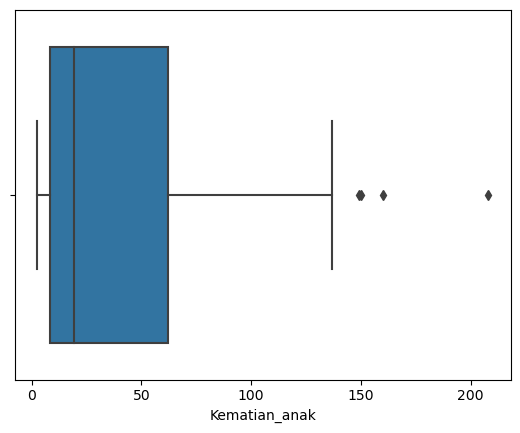

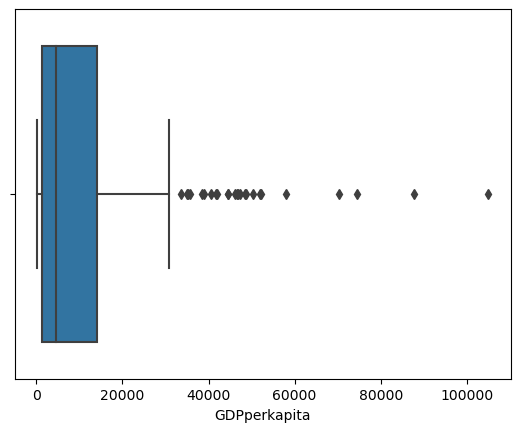

In [46]:
# Mengecek apakah terdapat outlier
sns.boxplot(x='Kematian_anak', data=data)
plt.show()
sns.boxplot(x='GDPperkapita', data=data)
plt.show()

In [65]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return lower, upper

In [68]:
lower_kematian_anak, upper_kematian_anak = boundaries(data, 'Kematian_anak')
print('upper boundaries:', upper_kematian_anak)
print('lower boundaries:', lower_kematian_anak)

upper boundaries: 142.875
lower boundaries: -72.525


In [69]:
lower_gdp, upper_gdp = boundaries(data, 'GDPperkapita')
print('upper boundaries:', upper_gdp)
print('lower boundaries:', lower_gdp)

upper boundaries: 33130.0
lower boundaries: -17750.0


Karena kasus yang dihadapi adalah membuat rekomendasi negara yang membutuhkan bantuan dengan asumsi data yang dimiliki adalah real maka tidak bisa dilakukan penghapusan data, maka untuk menghindari penghapusan data pada projek ini dilakukan dengan mengubah nilai nilai yang berada diluar batas dengan nilai batasan itu sendiri.

In [71]:
data['Kematian_anak'] =  np.where(data['Kematian_anak']  > upper_kematian_anak, upper_kematian_anak,
                         np.where(data['Kematian_anak']  < lower_kematian_anak, lower_kematian_anak, data['Kematian_anak']))

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_1080\3145061883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kematian_anak'] =  np.where(data['Kematian_anak']  > upper_kematian_anak, upper_kematian_anak,


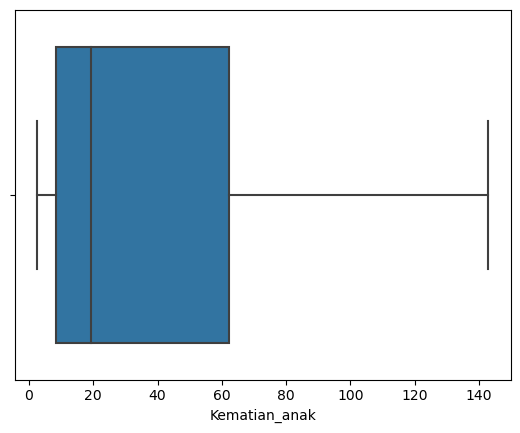

In [72]:
sns.boxplot(x='Kematian_anak', data=data)
plt.show()

In [73]:
data['GDPperkapita'] =  np.where(data['GDPperkapita']  > upper_gdp, upper_gdp,
                         np.where(data['GDPperkapita']  < lower_gdp, lower_gdp, data['GDPperkapita']))

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_1080\4285052987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GDPperkapita'] =  np.where(data['GDPperkapita']  > upper_gdp, upper_gdp,


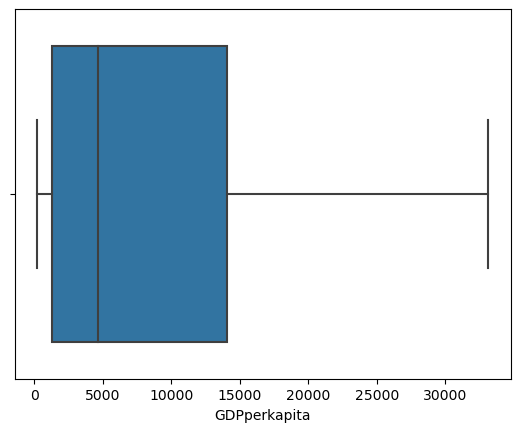

In [74]:
sns.boxplot(x='GDPperkapita', data=data)
plt.show()

In [80]:
data_new = data.copy()

In [85]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_std = sc.fit_transform(data_new)

C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


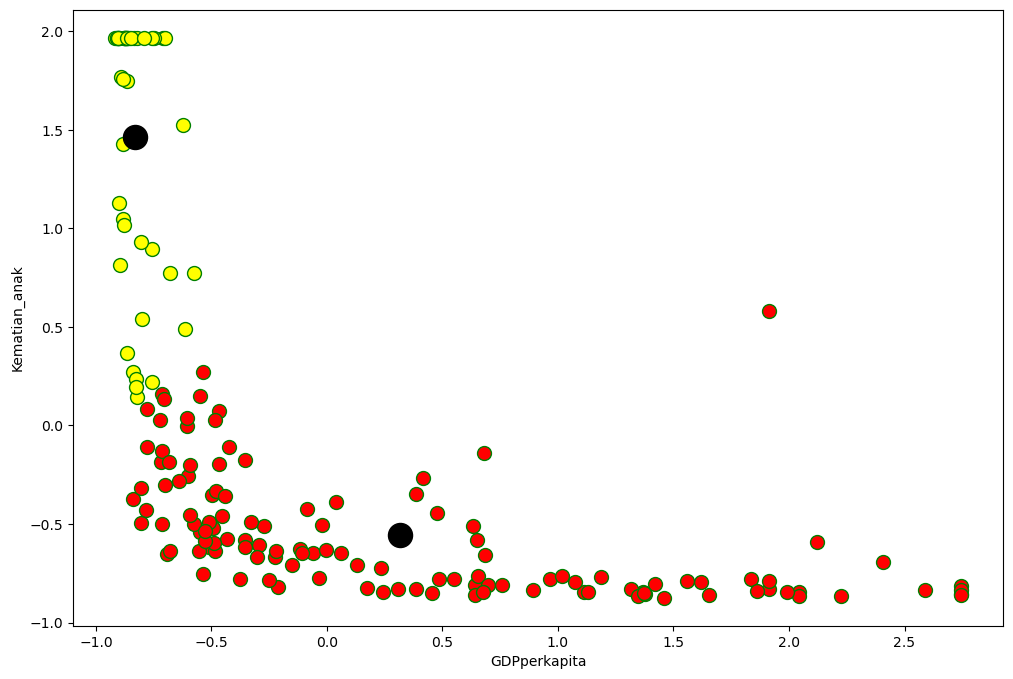

In [114]:
from sklearn.cluster import KMeans
# n=2
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(data_std)
labels1 = kmeans1.labels_

new_df = pd.DataFrame(data=data_std, columns=['GDPperkapita', 'Kematian_anak'])
new_df['label1_kmeans'] = labels1

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans == 0], new_df['Kematian_anak'][new_df.label1_kmeans == 0], c='red', s=100, edgecolor='green')
plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans == 1], new_df['Kematian_anak'][new_df.label1_kmeans == 1], c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

In [96]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data_std, labels=labels1))

0.531169750080884


C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\sit

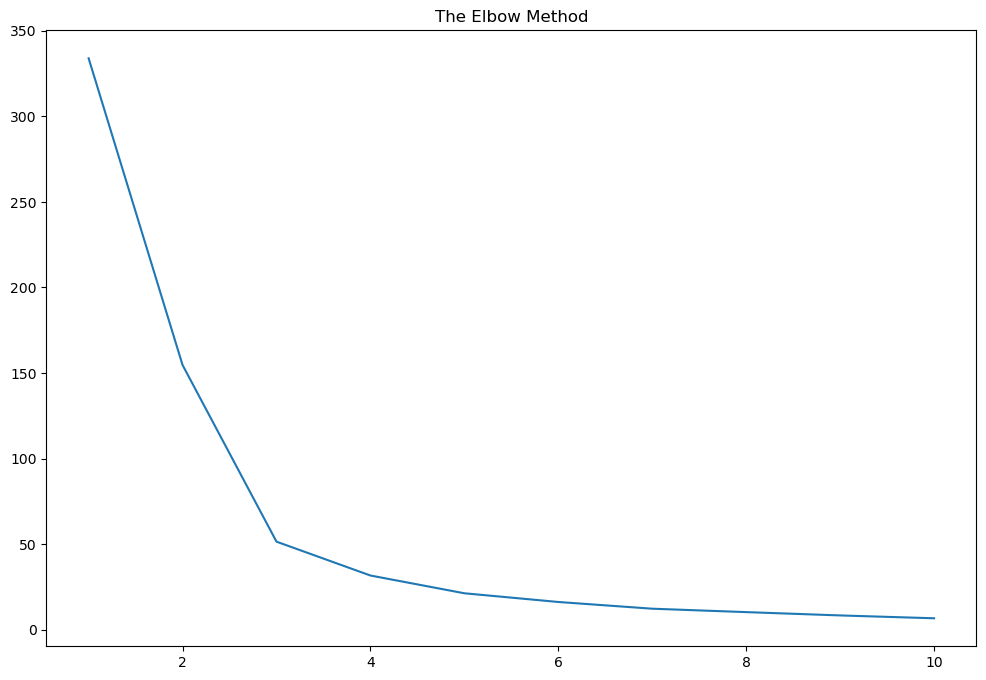

In [89]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')

plt.show();

C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


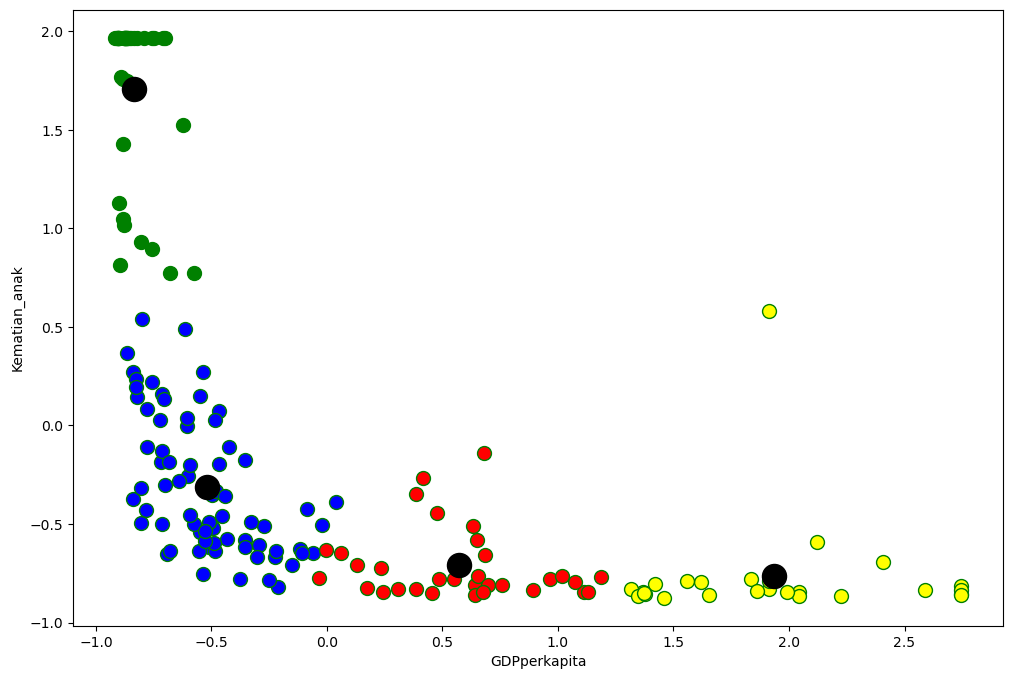

In [106]:
# n=4
kmeans2 = KMeans(n_clusters = 4, random_state=42).fit(data_std)
labels2 = kmeans2.labels_

new_df2 = pd.DataFrame(data=data_std, columns=['GDPperkapita', 'Kematian_anak'])
new_df2['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 0], new_df2['Kematian_anak'][new_df2.label2_kmeans == 0], c='red', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 1], new_df2['Kematian_anak'][new_df2.label2_kmeans == 1], c='yellow', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 2], new_df2['Kematian_anak'][new_df2.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 3], new_df2['Kematian_anak'][new_df2.label2_kmeans == 3], c='blue', s=100, edgecolor='green')


plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()



In [107]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data_std, labels=labels2))

0.5724557123177565


C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


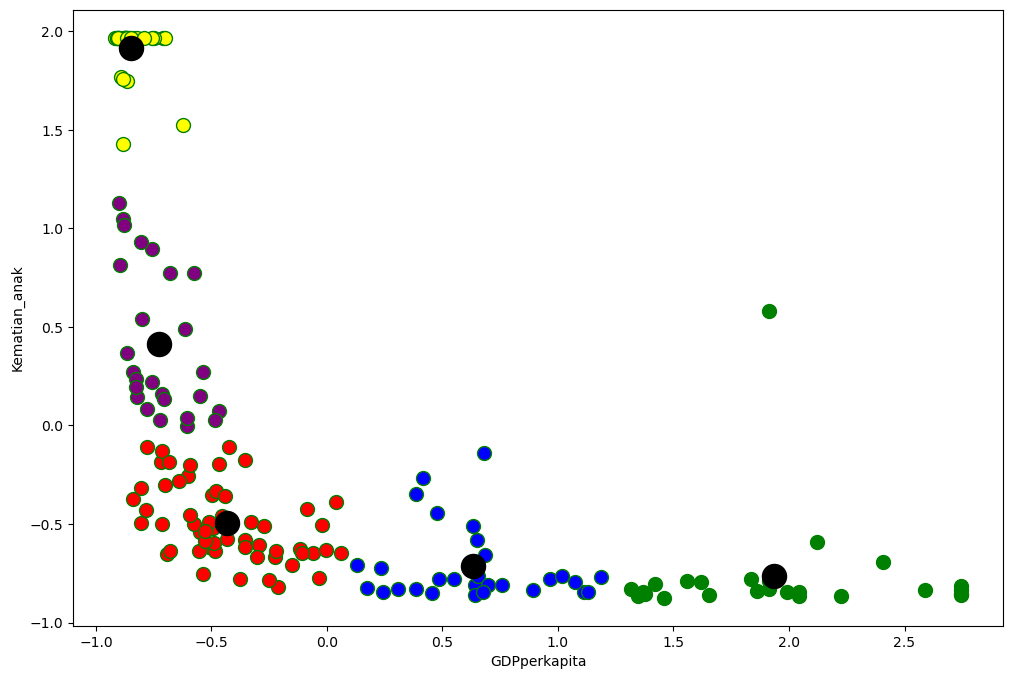

In [115]:
# n=5
kmeans3 = KMeans(n_clusters = 5, random_state=42).fit(data_std)
labels3 = kmeans3.labels_

new_df3 = pd.DataFrame(data=data_std, columns=['GDPperkapita', 'Kematian_anak'])
new_df3['label3_kmeans'] = labels3

plt.figure(figsize=(12,8))

plt.scatter(new_df3['GDPperkapita'][new_df3.label3_kmeans == 0], new_df3['Kematian_anak'][new_df3.label3_kmeans == 0], c='red', s=100, edgecolor='green')
plt.scatter(new_df3['GDPperkapita'][new_df3.label3_kmeans == 1], new_df3['Kematian_anak'][new_df3.label3_kmeans == 1], c='yellow', s=100, edgecolor='green')
plt.scatter(new_df3['GDPperkapita'][new_df3.label3_kmeans == 2], new_df3['Kematian_anak'][new_df3.label3_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df3['GDPperkapita'][new_df3.label3_kmeans == 3], new_df3['Kematian_anak'][new_df3.label3_kmeans == 3], c='blue', s=100, edgecolor='green')
plt.scatter(new_df3['GDPperkapita'][new_df3.label3_kmeans == 4], new_df3['Kematian_anak'][new_df3.label3_kmeans == 4], c='purple', s=100, edgecolor='green')

plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

In [116]:
print('Silhouette Score N=2 :',silhouette_score(data_std, labels=labels1))
print('Silhouette Score N=4 :',silhouette_score(data_std, labels=labels2))
print('Silhouette Score N=5 :',silhouette_score(data_std, labels=labels3))

Silhouette Score N=2 : 0.531169750080884
Silhouette Score N=4 : 0.5724557123177565
Silhouette Score N=5 : 0.5630058686530804


Dari ketiga model tersebut didapatkan bahwa jumlah cluster dengan score silhouette tertinggi adalah dengan 4 buah cluster.

C:\Users\Muhammad Naufal Rafi\Desktop\Training\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


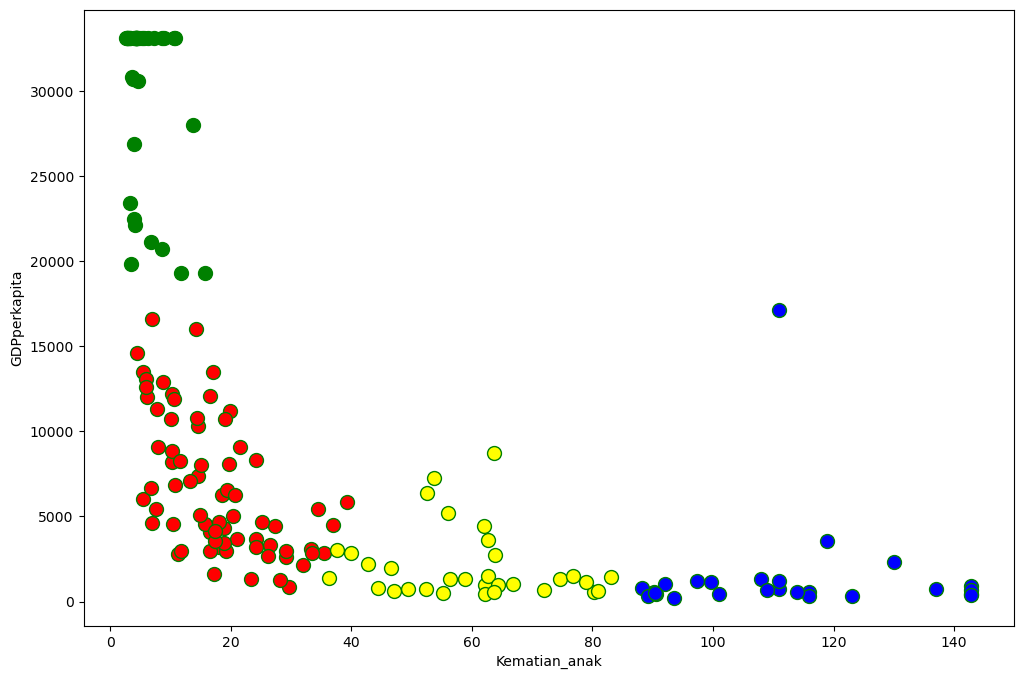

In [154]:
# n=4
normal_kmeans2 = KMeans(n_clusters = 4, random_state=42).fit(data_std)
normal_labels2 = normal_kmeans2.labels_

normal_df2 = pd.DataFrame(data=sc.inverse_transform(data_std), columns=['GDPperkapita', 'Kematian_anak'])
normal_df2['normal_kmeans'] = normal_labels2

plt.figure(figsize=(12,8))

plt.scatter(normal_df2['GDPperkapita'][normal_df2.normal_kmeans == 0], normal_df2['Kematian_anak'][normal_df2.normal_kmeans == 0], c='red', s=100, edgecolor='green')
plt.scatter(normal_df2['GDPperkapita'][normal_df2.normal_kmeans == 1], normal_df2['Kematian_anak'][normal_df2.normal_kmeans == 1], c='yellow', s=100, edgecolor='green')
plt.scatter(normal_df2['GDPperkapita'][normal_df2.normal_kmeans == 2], normal_df2['Kematian_anak'][normal_df2.normal_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(normal_df2['GDPperkapita'][normal_df2.normal_kmeans == 3], normal_df2['Kematian_anak'][normal_df2.normal_kmeans == 3], c='blue', s=100, edgecolor='green')



plt.xlabel('Kematian_anak')
plt.ylabel('GDPperkapita')
plt.show()



In [159]:
kmean_cluster = pd.Series(normal_labels2)

In [160]:
df['Cluster'] = kmean_cluster
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [161]:
df.Cluster.astype('object')

0      3
1      0
2      0
3      3
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: Cluster, Length: 167, dtype: object

In [163]:
cluster_3 = df[df['Cluster']==3]
cluster_3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3


In [176]:
cluster_3.sort_values(by=['Kematian_anak', 'GDPperkapita'],ascending=[False, True])[:].reset_index().head()

,index,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,3
1,132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,3
2,32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,3
3,31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,3
4,97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,3
